**PRODIGY INTERNSHIP TASK**

**NAME:** Aditya Pulikal

**TASK:** Machine learning : Cats-Dogs Classification using SVM

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 99% 216M/218M [00:10<00:00, 24.4MB/s]
100% 218M/218M [00:10<00:00, 20.9MB/s]


In [3]:
import zipfile
import os

# Define the path to the downloaded dataset
zip_path = "cat-and-dog.zip"

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("cat-and-dog")

print("Dataset extracted successfully.")

Dataset extracted successfully.


In [4]:
train_dir = "cat-and-dog/training_set/training_set"
test_dir = "cat-and-dog/test_set/test_set"

In [13]:
import tensorflow as tf

# Set parameters
image_size = (150, 150)  # Resize images to 150x150
batch_size = 32          # Batch size

# Load training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="binary"  # Cats and dogs are binary labels
)

# Load testing dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode="binary"
)

# Normalize pixel values (scale to range [0, 1])
train_dataset = train_dataset.map(lambda x, y: (x / 255.0, y))
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))

print("Datasets prepared successfully!")

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.
Datasets prepared successfully!


In [14]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
import numpy as np

# Load the VGG16 model without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze the base model

# Function to extract features
def extract_features(dataset, model):
    features = []
    labels = []
    for images, lbls in dataset:
        feature_batch = model.predict(images)
        features.append(feature_batch)
        labels.append(lbls)
    return np.vstack(features), np.concatenate(labels)

# Extract features for training and testing sets
train_features, train_labels = extract_features(train_dataset, base_model)
test_features, test_labels = extract_features(test_dataset, base_model)

# Flatten the extracted features for the SVM
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

print(f"Train Features Shape: {train_features.shape}")
print(f"Test Features Shape: {test_features.shape}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)
test_features = scaler.transform(test_features)

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Train the SVM classifier
svm = SVC(kernel='linear')
svm.fit(train_features, train_labels)

# Predict on the test set
test_predictions = svm.predict(test_features)

# Evaluate the SVM
accuracy = accuracy_score(test_labels, test_predictions)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 88.58%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1011
         1.0       0.89      0.89      0.89      1012

    accuracy                           0.89      2023
   macro avg       0.89      0.89      0.89      2023
weighted avg       0.89      0.89      0.89      2023



In [17]:
import numpy as np

# Identify correct predictions
correct_indices = np.where(test_predictions == test_labels)[0]
print(f"Number of correct predictions: {len(correct_indices)}")

Number of correct predictions: 2046264


Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89      1011
         1.0       0.89      0.89      0.89      1012

    accuracy                           0.89      2023
   macro avg       0.89      0.89      0.89      2023
weighted avg       0.89      0.89      0.89      2023



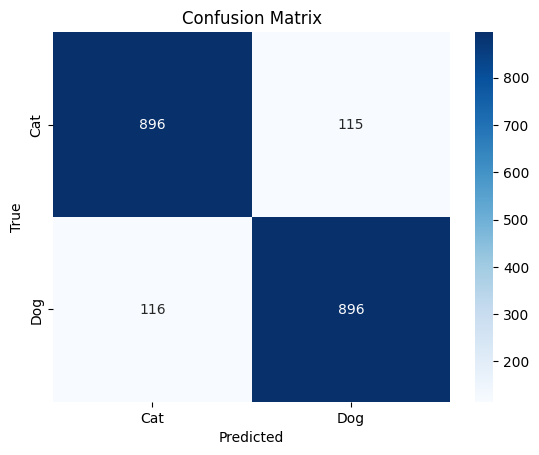

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate classification report
print("Classification Report:")
print(classification_report(test_labels, test_predictions))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cat', 'Dog'], yticklabels=['Cat', 'Dog'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [19]:
import os
from glob import glob

# Gather all file paths for cats and dogs
cat_files = glob(os.path.join(test_dir, "cats", "*.jpg"))
dog_files = glob(os.path.join(test_dir, "dogs", "*.jpg"))

# Combine file paths and create corresponding labels
test_file_paths = cat_files + dog_files
test_labels = [0] * len(cat_files) + [1] * len(dog_files)  # 0: cat, 1: dog


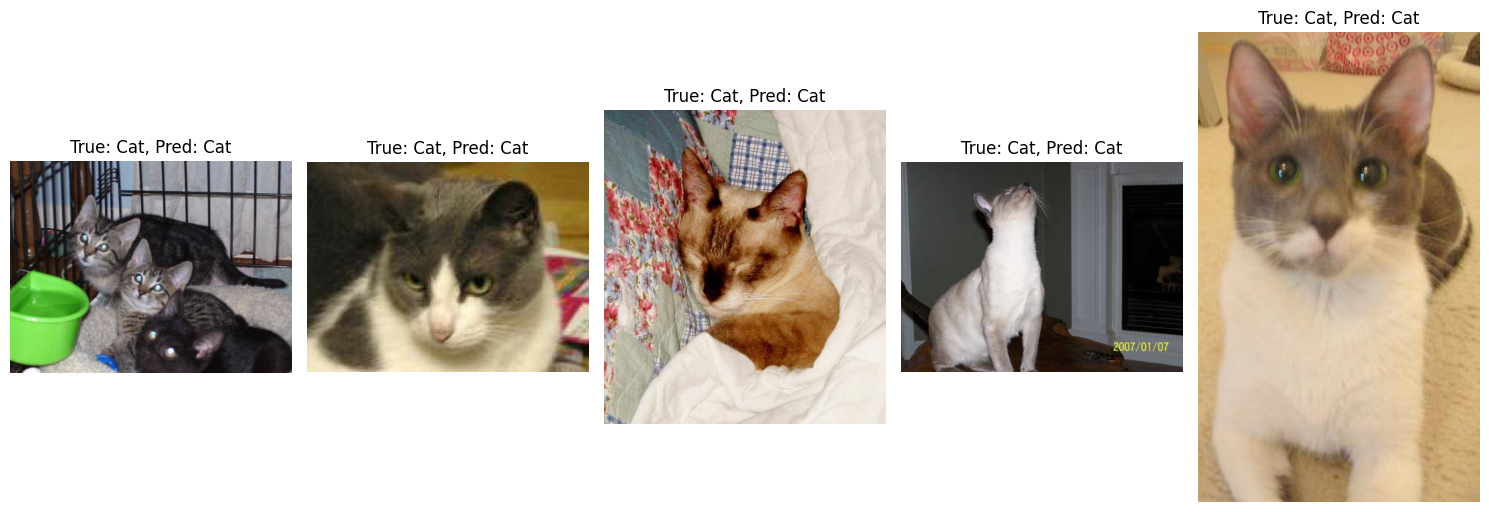

In [22]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Identify correct predictions
correct_indices = np.where(test_predictions == test_labels)[0]

# Function to plot correctly predicted images
def plot_correct_predictions(file_paths, labels, predictions, indices, num_images=5):
    plt.figure(figsize=(15, 5))
    for i, idx in enumerate(indices[:num_images]):
        img = Image.open(file_paths[idx])  # Load the image from the file path
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        label = "Cat" if labels[idx] == 0 else "Dog"
        pred = "Cat" if predictions[idx] == 0 else "Dog"
        plt.title(f"True: {label}, Pred: {pred}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display some correct predictions
plot_correct_predictions(test_file_paths, test_labels, test_predictions, correct_indices, num_images=5)